<a href="https://colab.research.google.com/github/MahalakshmiDSML/Machine-Learning-Project/blob/main/Machine_Learning_Capstone_Project_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Capstone Project - Credit Card Fraud Detection**

##**1) Exploratory Data Analysis (EDA):**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/MahalakshmiDSML/Machine-Learning-Project/refs/heads/main/Credit%20Card%20Fraud%20Detection%20csv%20file.txt")
df.head()        # Show first 5 Rows.

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
df.shape  # Show total no of Rows & Columns.

(5000, 15)

In [ ]:
df.info()    # Show no of rows& Columns, Data type, Non-sNull count also.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
df.describe()   # Show Numerical Features MEAN, COUNT, MIN,MAX,STD,25%,50%,75%

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


In [ ]:
df.isna().sum()    # Show null count

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
nullcount=df.isna().sum()
nullcount[nullcount>0]

,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314
Cardholder_Average_Spend,208
Credit_Limit,9
Device_Type,40


In [ ]:
df['Card_Type'].value_counts()   # Show count of this particular column

,count
Card_Type,
Visa,1979
Mastercard,1540
RuPay,947
American Express,517


In [ ]:
df['Card_Type'].mode()[0]    # Highly Repeated value.

'Visa'

In [ ]:
df['Merchant_Category'].value_counts()

,count
Merchant_Category,
Online Shopping,1019
Retail,959
Utility bill,521
Education,519
Entertainment,517
Healthcare,496
Dining,481
Transportation,466


In [ ]:
df['Merchant_Category'].mode()[0]

'Online Shopping'

In [ ]:
df['Transaction_Amount'].nunique()   # Count of Unique Value.

4873

In [ ]:
df['Transaction_Amount'].unique()  # Show Unique value


array([ 27214.,  83956., 193280., ...,  33788.,  38679.,  34672.])

In [ ]:
df['Transaction_Amount'].value_counts()

,count
Transaction_Amount,
59675.0,3
25207.0,3
42580.0,2
146937.0,2
39287.0,2
...,...
45982.0,1
98366.0,1
29993.0,1


In [ ]:
df['Transaction_Amount'].mean()   # Average of this column.

np.float64(74667.99599519423)

In [ ]:
df['Cardholder_Age'].value_counts()

,count
Cardholder_Age,
26.0,98
75.0,96
76.0,91
19.0,91
69.0,89
...,...
37.0,65
34.0,61
27.0,61


In [ ]:
df['Cardholder_Age'].unique()

array([23., 49., nan, 52., 37., 80., 33., 46., 44., 77., 60., 79., 40.,
       61., 73., 34., 70., 18., 45., 39., 69., 47., 28., 30., 65., 31.,
       55., 62., 48., 26., 66., 57., 76., 20., 54., 35., 75., 53., 21.,
       27., 56., 19., 71., 29., 32., 63., 72., 41., 38., 64., 25., 58.,
       74., 78., 50., 68., 24., 36., 43., 22., 59., 42., 51., 67.])

In [ ]:
df['Cardholder_Age'].nunique()

63

In [ ]:
df['Cardholder_Age'].mean()

np.float64(49.106680369989725)

In [ ]:
df['Cardholder_Gender'].value_counts()

,count
Cardholder_Gender,
Female,2489
Male,2422


In [ ]:
df['Cardholder_Gender'].nunique()

2

In [ ]:
df['Cardholder_Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
df['Cardholder_Gender'].mode()[0]

'Female'

In [ ]:
df['Cardholder_Monthly_Income'].value_counts()

,count
Cardholder_Monthly_Income,
171912.0,2
78951.0,2
129435.0,2
122137.0,2
183353.0,2
...,...
287927.0,1
38566.0,1
151349.0,1


In [ ]:
df['Cardholder_Monthly_Income'].nunique()

4628

In [ ]:
df['Cardholder_Monthly_Income'].unique()

array([ 94632., 148118., 210921., ...,  60868.,  66948.,  58261.])

In [ ]:
df['Cardholder_Monthly_Income'].mean()

np.float64(137353.8175416133)

In [ ]:
df['Cardholder_Average_Spend'].unique()

array([ 36369.65,  89179.12, 106668.6 , ...,  33876.96,  32988.22,
        39412.26])

In [ ]:
df['Cardholder_Average_Spend'].nunique()

4791

In [ ]:
df['Cardholder_Average_Spend'].value_counts()

,count
Cardholder_Average_Spend,
51885.56,2
127718.13,1
42404.81,1
65916.98,1
44861.44,1
...,...
84014.07,1
27745.12,1
29476.72,1


In [ ]:
df['Cardholder_Average_Spend'].mean()

np.float64(63058.3435663606)

In [ ]:
df['Credit_Limit'].value_counts()

,count
Credit_Limit,
100000.0,1270
150000.0,1252
50000.0,1243
200000.0,1226


In [ ]:
df['Credit_Limit'].nunique()

4

In [ ]:
df['Credit_Limit'].unique()

array([100000., 150000., 200000.,  50000.,     nan])

In [ ]:
df['Credit_Limit'].mean()

np.float64(124654.37788018433)

In [ ]:
df['Device_Type'].value_counts(dropna=False)

,count
Device_Type,
Unknown,1022
Mobile,1012
Contactless Payment Device,994
Point-of-Sale Terminal,989
Desktop,943
NaN,40


In [ ]:
df['Device_Type'].mode()[0]

'Unknown'

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [ ]:
df.duplicated().sum()   # Show Duplicate Data Count.

np.int64(0)

In [ ]:
df[df.duplicated()]      # Show Duplicate Rows, no duplicates values here.

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent


#**Summary:**

**No.of Rows and Columns(5000 Rows & 15 Features).**

**In this dataset has -->10 Features(Object Dtypes),5 Features(Float Dtypes)**

**In this dataset Null column &count--> Card_Type(17),Merchant_Category(22),Transaction_Amount(6),Cardholder_Age(135),Cardholder_Gender(89),Cardholder_Monthly_Income(314),Cardholder_Average_Spend(208),Credit_Limit(9),Device_Type(40)**

**In this dataset has some null values. Categorical column impute mode value.Numeric column impute mean value.**

**No duplicate Values Here.**

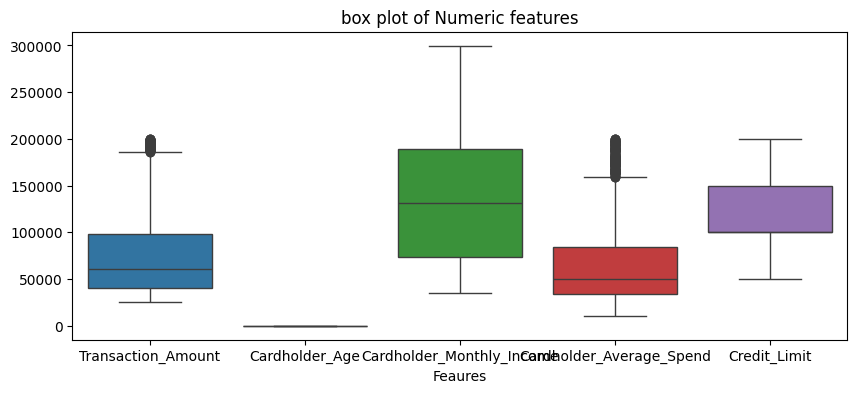

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df)
plt.title("box plot of Numeric features")
plt.xlabel("Feaures")
plt.show()

###**Interpretation:**
   **In this chart we can see the outliers in two features like(Transaction_Amount & Cardholder-Averge_spend).**

###**a) Analyze the distribution of categorical features such as Card_Type, Merchant_Category,Location, etc.**

In [ ]:
df['Card_Type'].value_counts()

,count
Card_Type,
Visa,1979
Mastercard,1540
RuPay,947
American Express,517


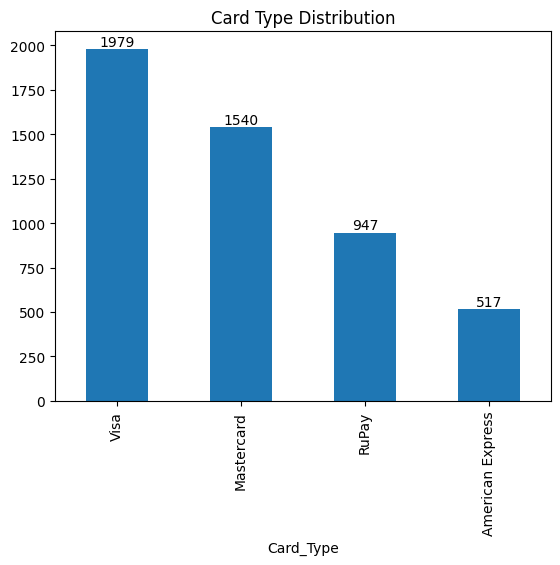

In [ ]:
bar1=df['Card_Type'].value_counts().plot(kind='bar', title='Card Type Distribution')
bar1.bar_label(bar1.containers[0])
plt.show()

###**Interpretation:**
   **In this chart we can see type of cards and count , to see visa card_type is highest one and American Express is less count compare to others.**

In [ ]:
df['Merchant_Category'].value_counts()

,count
Merchant_Category,
Online Shopping,1019
Retail,959
Utility bill,521
Education,519
Entertainment,517
Healthcare,496
Dining,481
Transportation,466


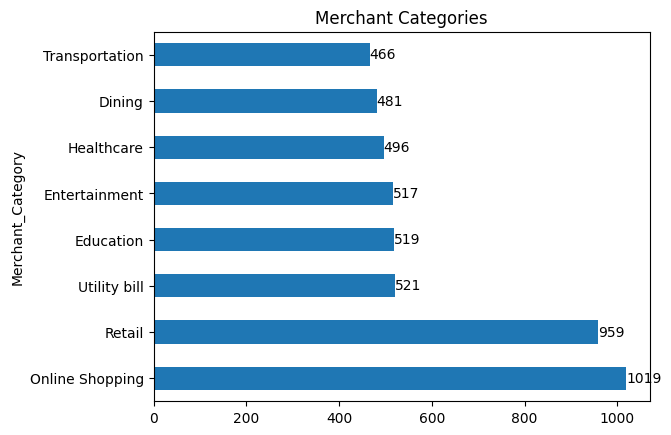

In [ ]:
bar2=df['Merchant_Category'].value_counts().plot(kind='barh', title='Merchant Categories')
bar2.bar_label(bar2.containers[0])
plt.show()

###**Interpretation:**
**In this chart we can see the merchant category and count , online shopping is highest count of this category and Transporation is less count to compare others.**


In [ ]:
df['Location'].value_counts()

,count
Location,
Surat,431
Kochi,415
Bengaluru,410
Hyderabad,395
Mumbai,387
Chennai,387
Lucknow,379
Pune,376
Kolkata,373


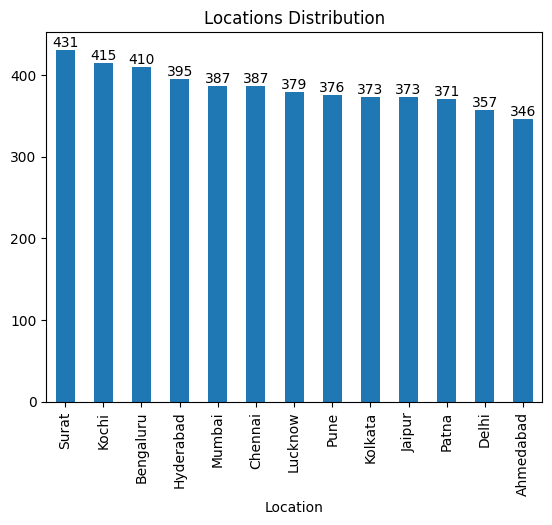

In [ ]:
bar3=df['Location'].value_counts().plot(kind='bar', title='Locations Distribution')
bar3.bar_label(bar3.containers[0])
plt.show()

###**Interpretation:**
**In this chart we can see Location and it's count also.To see 13 location here. All are slightly differ from each one to another, the count difference is around 15 counts.**


###**b) Explore numerical features like Transaction_Amount, Cardholder_Age,Cardholder_Monthly_Income, and Cardholder_Average_Spend.**
###**Use descriptive statistics to understand their central tendency and spread.**


In [ ]:
df['Transaction_Amount'].value_counts()

,count
Transaction_Amount,
59675.0,3
25207.0,3
42580.0,2
146937.0,2
39287.0,2
...,...
45982.0,1
98366.0,1
29993.0,1


In [ ]:
df['Transaction_Amount'].nunique()

4873

In [ ]:
df['Transaction_Amount'].unique()

array([ 27214.,  83956., 193280., ...,  33788.,  38679.,  34672.])

In [ ]:
df['Cardholder_Age'].value_counts()

,count
Cardholder_Age,
26.0,98
75.0,96
76.0,91
19.0,91
69.0,89
...,...
37.0,65
34.0,61
27.0,61


In [ ]:
df['Cardholder_Age'].nunique()

63

In [ ]:
df['Cardholder_Age'].unique()

array([23., 49., nan, 52., 37., 80., 33., 46., 44., 77., 60., 79., 40.,
       61., 73., 34., 70., 18., 45., 39., 69., 47., 28., 30., 65., 31.,
       55., 62., 48., 26., 66., 57., 76., 20., 54., 35., 75., 53., 21.,
       27., 56., 19., 71., 29., 32., 63., 72., 41., 38., 64., 25., 58.,
       74., 78., 50., 68., 24., 36., 43., 22., 59., 42., 51., 67.])

In [ ]:
df['Cardholder_Monthly_Income'].value_counts()

,count
Cardholder_Monthly_Income,
171912.0,2
78951.0,2
129435.0,2
122137.0,2
183353.0,2
...,...
287927.0,1
38566.0,1
151349.0,1


In [ ]:
df['Cardholder_Monthly_Income'].nunique()

4628

In [ ]:
df['Cardholder_Monthly_Income'].unique()

array([ 94632., 148118., 210921., ...,  60868.,  66948.,  58261.])

In [ ]:
df['Cardholder_Average_Spend'].value_counts()

,count
Cardholder_Average_Spend,
51885.56,2
127718.13,1
42404.81,1
65916.98,1
44861.44,1
...,...
84014.07,1
27745.12,1
29476.72,1


In [ ]:
df['Cardholder_Average_Spend'].unique()

array([ 36369.65,  89179.12, 106668.6 , ...,  33876.96,  32988.22,
        39412.26])

In [ ]:
df['Cardholder_Average_Spend'].nunique()

4791

###**Visualize 1 :Relationship between Cardholder_Average_Spend & Cadholder_Monthly_Income**

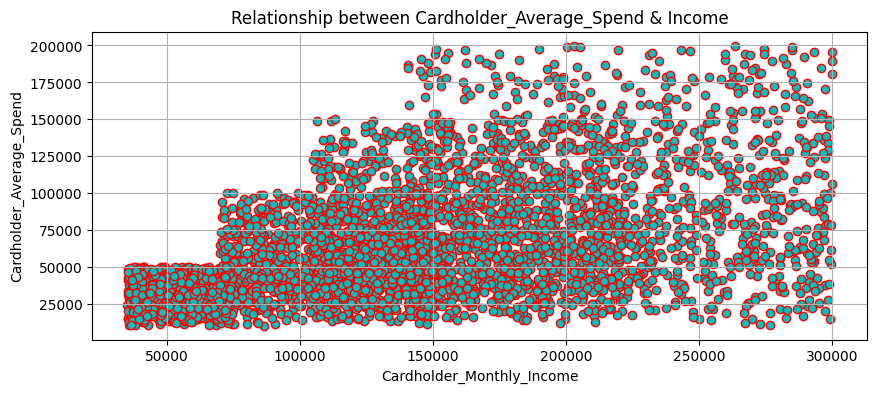

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(df['Cardholder_Monthly_Income'],df['Cardholder_Average_Spend'],color='c',edgecolor='r')
plt.title('Relationship between Cardholder_Average_Spend & Income')
plt.xlabel("Cardholder_Monthly_Income")
plt.ylabel("Cardholder_Average_Spend")
plt.grid(True)
plt.show()

###**Interpretation:**
**In this chart we can see Cardholder_Monthly_Income is increase Cardholder_Average_Spend is also increase. This is possitive correlation.we can see majority Cardholder_Average_Spend below 50000 to 200000.**

###**Visualize 2 : Relationship between Cardholder_Age & Cardholder_Monthly_Income**

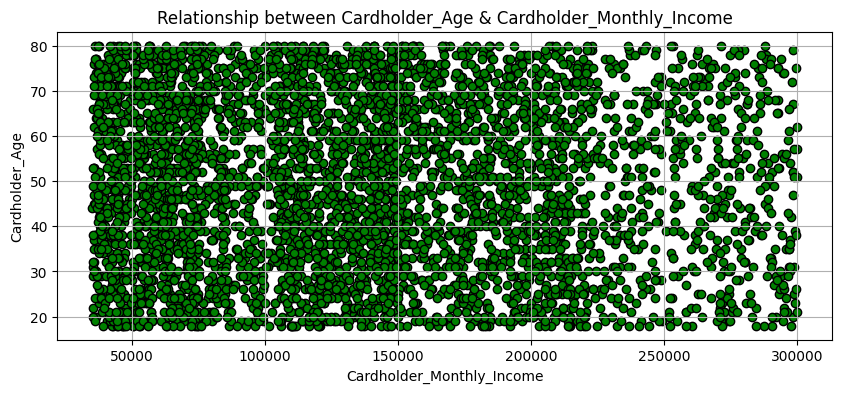

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(df['Cardholder_Monthly_Income'],df['Cardholder_Age'],color='g',edgecolor='black')
plt.title('Relationship between Cardholder_Age & Cardholder_Monthly_Income')
plt.xlabel("Cardholder_Monthly_Income")
plt.ylabel("Cardholder_Age")
plt.grid(True)
plt.show()

###**Interpretation:**
**In this chart we can see Cardholder age and Monthly income. Majority salary below 1.50L. Age increase also salary increase.**

###**Visualize 3 : Relationship between Transaction_Amount & Cardholder_Average_Spend**

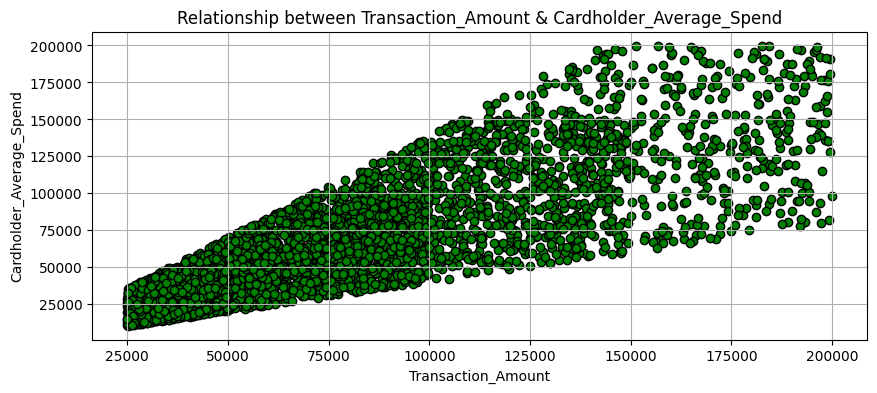

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(df['Transaction_Amount'],df['Cardholder_Average_Spend'],color='g',edgecolor='black')
plt.title('Relationship between Transaction_Amount & Cardholder_Average_Spend')
plt.xlabel("Transaction_Amount")
plt.ylabel("Cardholder_Average_Spend")
plt.grid(True)
plt.show()

###**Interpretation:**
**In this we can see cardholder_Average_spend and Transaction_Amount.Majority Amount of two Features is below 75000.cardholder_Average_spend is increase also Transaction_Amount is increase.**

###**c) Conduct bivariate and multivariate analysis to identify potential relationships between the features as well as with the target variable (Is_Fraudulent).**


In [ ]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


###**Visualize 4 : To visualize the Card_Type & Credit_Limit by Is_Fraudulent**

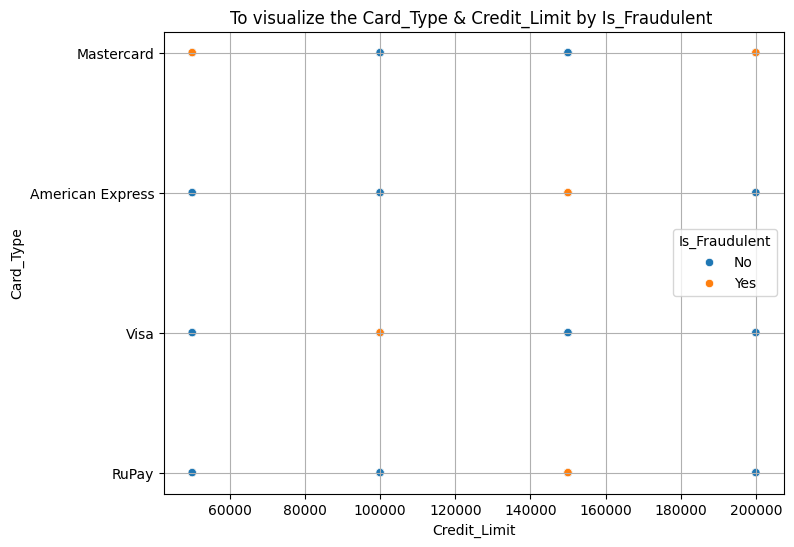

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Credit_Limit',y='Card_Type',hue='Is_Fraudulent')
plt.title("To visualize the Card_Type & Credit_Limit by Is_Fraudulent ")
plt.xlabel('Credit_Limit')
plt.ylabel('Card_Type')
plt.grid(True)
plt.show()


###**Interpretation:**
 **In this chart we can see card_type,Credit_limit & Is_Fraudulent.All card limit is 60k to 2L.In Master Card To indicate 2 no of Is_Fraudulent , and other also indicate only one.**

###**Visualize 5 : The Relationship between Cardholder_Monthly_Income and Credit_Limit**

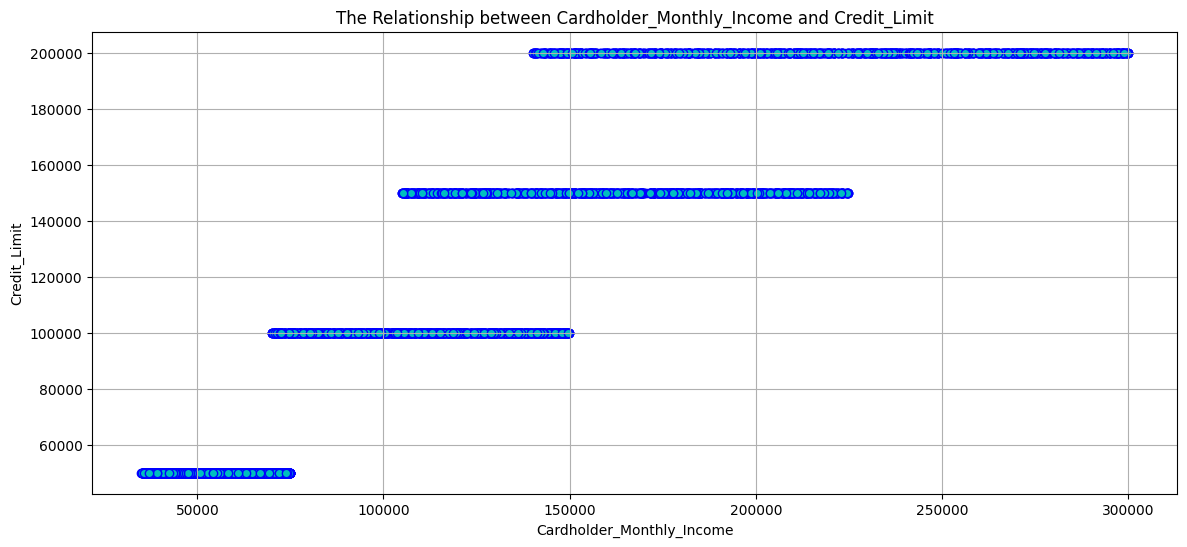

In [ ]:
plt.figure(figsize=(14,6))
plt.scatter(df['Cardholder_Monthly_Income'],df['Credit_Limit'],color='c',edgecolor='b')
plt.title("The Relationship between Cardholder_Monthly_Income and Credit_Limit")
plt.xlabel("Cardholder_Monthly_Income")
plt.ylabel("Credit_Limit")
plt.grid(True)
plt.show()

###**Interpretation:**
**In this chart we can see Salary increase also credit limit is increase. this is positive correlation.**


In [ ]:
gdata=df.groupby(['Region','Location'])['Credit_Limit'].mean().sort_values().reset_index()
gdata

,Region,Location,Credit_Limit
0,East,Patna,116756.756757
1,West,Mumbai,121447.028424
2,South,Hyderabad,122658.227848
3,North,Lucknow,124274.406332
4,West,Surat,124941.995360
5,West,Ahmedabad,125072.463768
6,South,Chennai,125193.798450
7,South,Bengaluru,125245.098039
8,East,Kolkata,125268.817204
9,South,Kochi,125724.637681


In [ ]:
gdata1=df.groupby(['Region','Location'])['Credit_Limit'].mean()
gdata1

Region  Location 
East    Kolkata      125268.817204
        Patna        116756.756757
North   Delhi        129073.033708
        Jaipur       126612.903226
        Lucknow      124274.406332
South   Bengaluru    125245.098039
        Chennai      125193.798450
        Hyderabad    122658.227848
        Kochi        125724.637681
West    Ahmedabad    125072.463768
        Mumbai       121447.028424
        Pune         128400.000000
        Surat        124941.995360
Name: Credit_Limit, dtype: float64

###**Visualize 6 : Average credit limit by Location and Region**

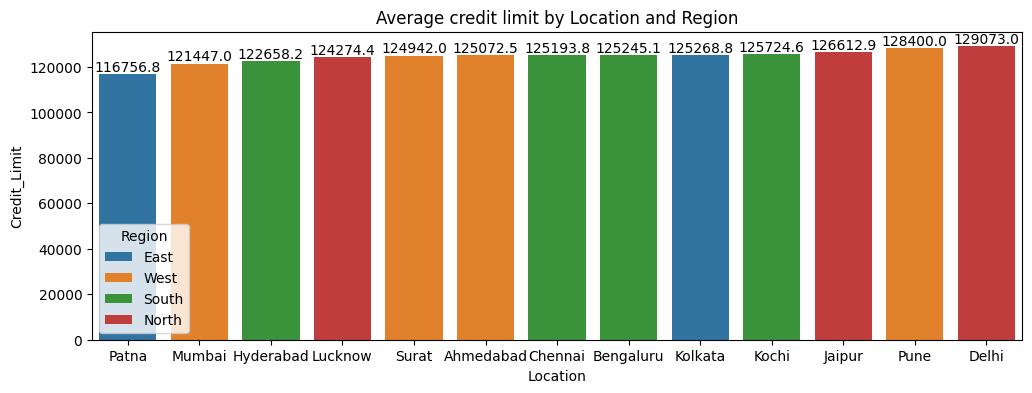

In [ ]:
plt.figure(figsize=(12,4))
bar4=sns.barplot(data=gdata,x='Location',y='Credit_Limit',hue='Region')
for container in bar4.containers:
  bar4.bar_label(container,fmt='%.1f')
plt.title("Average credit limit by Location and Region")
plt.xlabel("Location")
plt.ylabel("Credit_Limit")
plt.legend(title='Region')
plt.show()

###**Interpretation:**
 **In this chart we can see all the Location of Average credit limit between     1.16L to 1.29L. Delhi(North Region) is the highest average credit limit location & Patna (East Region) is last one.Slightly differ amount is around 1500 for others but patna to Delhi differ 13k.**

In [ ]:
gda2=df.groupby(['Region','Location'])['Transaction_Amount'].max()
gda2

Region  Location 
East    Kolkata      198998.0
        Patna        198614.0
North   Delhi        199536.0
        Jaipur       198269.0
        Lucknow      198388.0
South   Bengaluru    199043.0
        Chennai      199088.0
        Hyderabad    197443.0
        Kochi        199923.0
West    Ahmedabad    198239.0
        Mumbai       197999.0
        Pune         198707.0
        Surat        197027.0
Name: Transaction_Amount, dtype: float64

###**Visualize 7 : Maximum Transaction Amount by Location and Region**

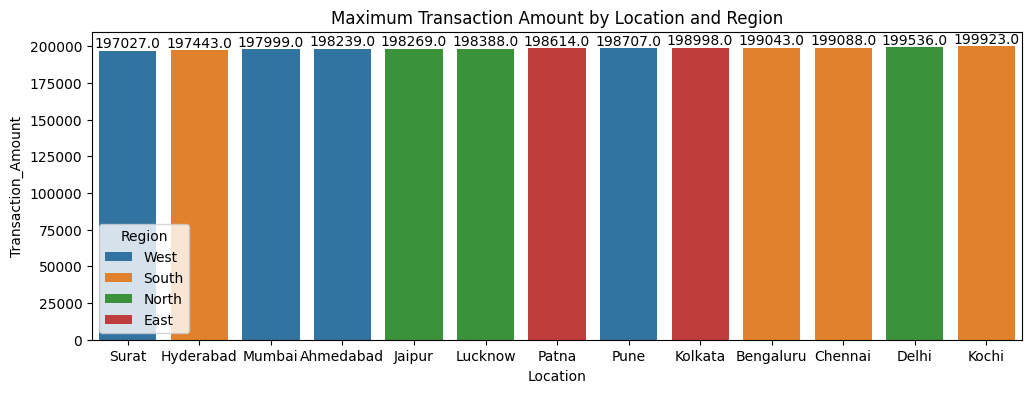

In [ ]:
gdata2=df.groupby(['Region','Location'])['Transaction_Amount'].max().sort_values().reset_index()
plt.figure(figsize=(12,4))
bar5=sns.barplot(data=gdata2,x='Location',y='Transaction_Amount',hue='Region')
for container in bar5.containers:
  bar5.bar_label(container,fmt='%.1f')
plt.title("Maximum Transaction Amount by Location and Region")
plt.xlabel("Location")
plt.ylabel("Transaction_Amount")
plt.legend(title='Region')
plt.show()

###**Interpretation:**
**In this chart we can see Maximum Transaction Amount by location & region. To see highest transaction Amout is kochi(South region) .All location differ  amount is 500 only slightly differ from each other.**

In [ ]:
gda3=df.groupby(['Is_Fraudulent','Location'])['Transaction_Amount'].mean()
gda3

Is_Fraudulent  Location 
No             Ahmedabad    75752.963370
               Bengaluru    76602.767213
               Chennai      76778.465753
               Delhi        81441.138462
               Hyderabad    73936.308244
               Jaipur       77824.636364
               Kochi        76044.690000
               Kolkata      76781.786822
               Lucknow      72024.107527
               Mumbai       70365.558719
               Patna        69976.612782
               Pune         76579.013841
               Surat        73551.308411
Yes            Ahmedabad    80064.643836
               Bengaluru    74086.990476
               Chennai      76036.873684
               Delhi        74271.694737
               Hyderabad    71492.241379
               Jaipur       76293.688679
               Kochi        71830.260870
               Kolkata      70526.271930
               Lucknow      79555.940000
               Mumbai       71521.915094
               Patna        67592.457143
               Pune         65696.655172
               Surat        75458.000000
Name: Transaction_Amount, dtype: float64

###**Visualize 8 : Average Transaction Amount by Location and Is_Fraudulent**

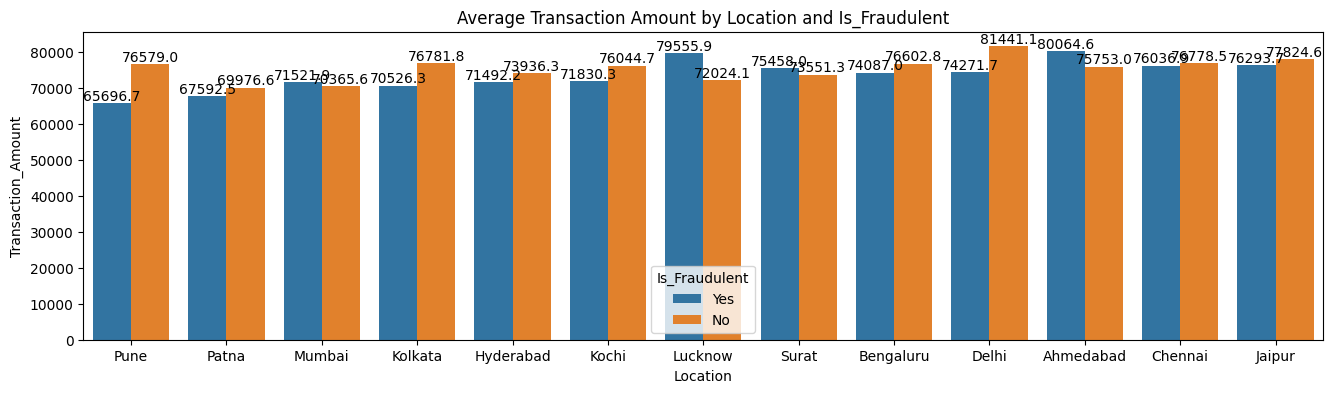

In [ ]:

gdata3=df.groupby(['Is_Fraudulent','Location'])['Transaction_Amount'].mean().sort_values().reset_index()
plt.figure(figsize=(16,4))
bar6=sns.barplot(data=gdata3,x='Location',y='Transaction_Amount',hue='Is_Fraudulent')
for container in bar6.containers:
  bar6.bar_label(container,fmt='%.1f')
plt.title("Average Transaction Amount by Location and Is_Fraudulent")
plt.xlabel("Location")
plt.ylabel("Transaction_Amount")
plt.legend(title='Is_Fraudulent')
plt.show()

###**Interpretation:**
**In this chart we can see the Average Transaction Amount by location wise Is_Fraudulent.Highest Is_Fraudulent is occur in Ahmedabad & Lucknow Location.**

###**Visualize 9 : The Distribution of Credit_Limit by Merchant_Category**


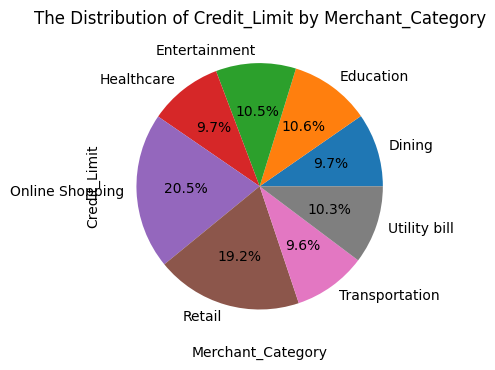

In [ ]:
max1=df.groupby('Merchant_Category')['Credit_Limit'].sum()
plt.figure(figsize=(12,4))
max1.plot(kind='pie',autopct='%1.1f%%')
plt.title("The Distribution of Credit_Limit by Merchant_Category")
plt.xlabel("Merchant_Category")
plt.ylabel("Credit_Limit")
plt.show()

###**Interpretation:**
**In this chart we can see the Majority credit limit spend in online shopping(20.5%). Least spend is Transporation (9.6%).**

In [ ]:
gda4=df.groupby(['Card_Type','Merchant_Category'])['Transaction_Amount'].mean()
gda4

Card_Type         Merchant_Category
American Express  Dining               72861.520833
                  Education            75086.135593
                  Entertainment        66446.396226
                  Healthcare           68095.081633
                  Online Shopping      69932.656566
                  Retail               85784.950980
                  Transportation       71715.360000
                  Utility bill         69627.072727
Mastercard        Dining               75143.654135
                  Education            74425.825503
                  Entertainment        82522.578947
                  Healthcare           70343.993789
                  Online Shopping      73592.700680
                  Retail               72264.265517
                  Transportation       74706.931034
                  Utility bill         73899.874346
RuPay             Dining               77673.252747
                  Education            66979.243243
                  Entertainment        77837.979381
                  Healthcare           68483.296703
                  Online Shopping      75441.734597
                  Retail               69664.743750
                  Transportation       84933.080460
                  Utility bill         77466.817204
Visa              Dining               76554.323671
                  Education            75200.673469
                  Entertainment        75225.247423
                  Healthcare           75994.264550
                  Online Shopping      77451.613139
                  Retail               76241.874074
                  Transportation       74351.650273
                  Utility bill         69295.361111
Name: Transaction_Amount, dtype: float64

###**Visualize 10 : Average Transaction amount by Merchant_Category and Card_Type**

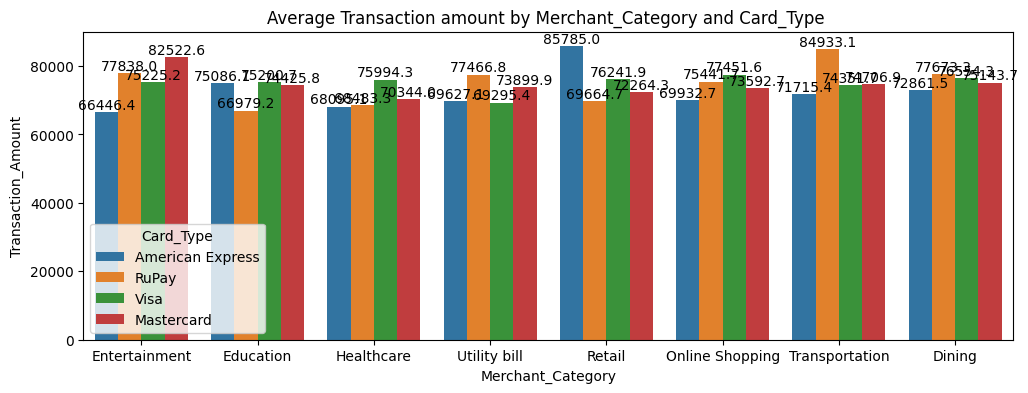

In [ ]:
gdata4=df.groupby(['Card_Type','Merchant_Category'])['Transaction_Amount'].mean().sort_values().reset_index()
plt.figure(figsize=(12,4))
bar7=sns.barplot(data=gdata4,x='Merchant_Category',y='Transaction_Amount',hue='Card_Type')
for container in bar7.containers:
  bar7.bar_label(container,fmt='%.1f')
plt.title("Average Transaction amount by Merchant_Category and Card_Type ")
plt.xlabel("Merchant_Category")
plt.ylabel("Transaction_Amount")
plt.legend(title='Card_Type')
plt.show()

###**Interpretation:**
**In this chart we can see the Average Transaction amount spend  is differ from card type and merchant category.**

###**Visualize 11 : The Relationship of Card_Type & Transaction_Amount**

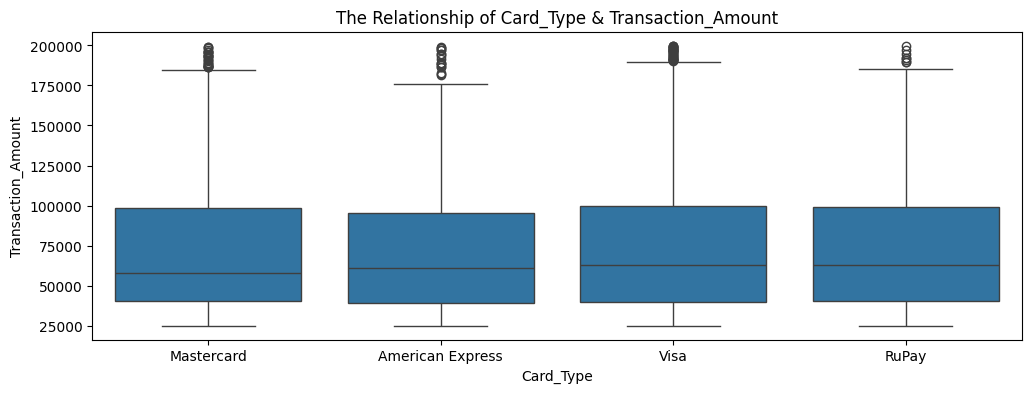

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df,x='Card_Type',y='Transaction_Amount')
plt.title("The Relationship of Card_Type & Transaction_Amount")
plt.xlabel("Card_Type")
plt.ylabel("Transaction_Amount")
plt.show()

###**Interpretation:**
**In this chart we can see some outliers in all card type.All Transaction amount between 50k to 1L.**

###**Visualize 12 : The Relationship of Cardholder_Age & Cardholder_Gender**

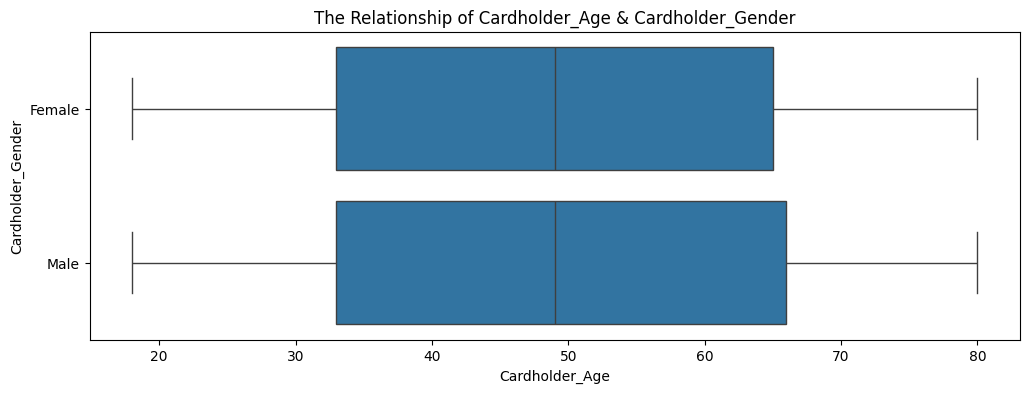

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df,x='Cardholder_Age',y='Cardholder_Gender')
plt.title("The Relationship of Cardholder_Age & Cardholder_Gender")
plt.xlabel("Cardholder_Age")
plt.ylabel("Cardholder_Gender")
plt.show()

###**Interpretation:**
**In this chart we can see Gender age category between 30 to 65.**

###**Visualize 13 : The Distribution of Credit_Limit & Is_Fraudulent**

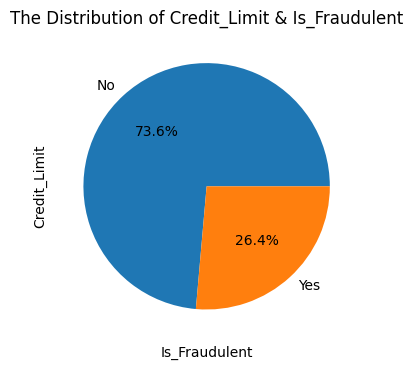

In [ ]:
gda5=df.groupby('Is_Fraudulent')['Credit_Limit'].sum()
plt.figure(figsize=(12,4))
gda5.plot(kind='pie',autopct='%1.1f%%')
plt.title("The Distribution of Credit_Limit & Is_Fraudulent")
plt.xlabel("Is_Fraudulent")
plt.ylabel("Credit_Limit")
plt.show()

###**Interpretation:**
**In this chart we can see the credit limit by Is_Fraudulent to occur 26.4% possible.**

###**Visualize 14 : The Distribution of Card_Type & Transaction_Amount**

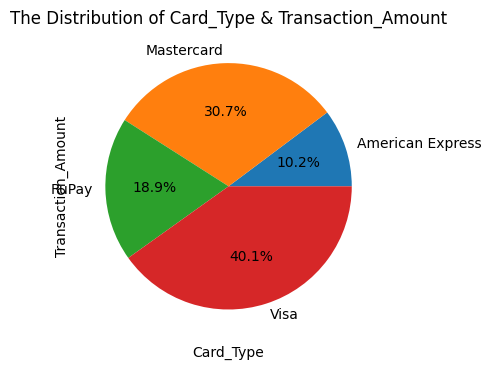

In [ ]:
gda6=df.groupby('Card_Type')['Transaction_Amount'].sum()
plt.figure(figsize=(12,4))
gda6.plot(kind='pie',autopct='%1.1f%%')
plt.title("The Distribution of Card_Type & Transaction_Amount")
plt.xlabel("Card_Type")
plt.ylabel("Transaction_Amount")
plt.show()

###**Interpretation:**
**In this chart we can see the maximum distribution in visa card(40%).least distribuion is in American express(10%).**

###**Visualize 15 : Cardholder_Monthly_Income & Transaction_Amount by Is_Fraudulent**

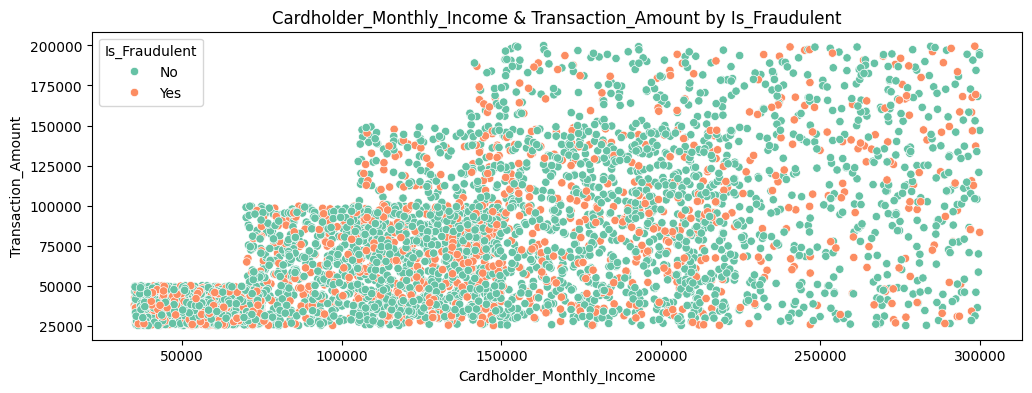

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df,x='Cardholder_Monthly_Income',y='Transaction_Amount',hue='Is_Fraudulent',palette='Set2')
plt.title("Cardholder_Monthly_Income & Transaction_Amount by Is_Fraudulent")
plt.xlabel("Cardholder_Monthly_Income")
plt.ylabel("Transaction_Amount")
plt.legend(title='Is_Fraudulent')
plt.show()

###**Interpretation:**
**In this chart we can see salary increase also Transaction increase.Is_Fraudulent spread low to high. Majority data points are not Is_Fraudulent.**

In [ ]:
gda8=df.groupby(['Card_Type','Location'])['Credit_Limit'].mean().sort_values().reset_index()
gda8

,Card_Type,Location,Credit_Limit
0,American Express,Patna,108108.108108
1,RuPay,Chennai,114473.684211
2,RuPay,Patna,114492.753623
3,Mastercard,Patna,115277.777778
4,RuPay,Kolkata,115833.333333
5,American Express,Mumbai,116666.666667
6,Mastercard,Jaipur,117105.263158
7,Mastercard,Lucknow,118067.226891
8,Mastercard,Mumbai,118103.448276
9,American Express,Chennai,118750.000000


###**Visualize 16 : Average Distribution of Credit_Limit by Card_Type and Location**


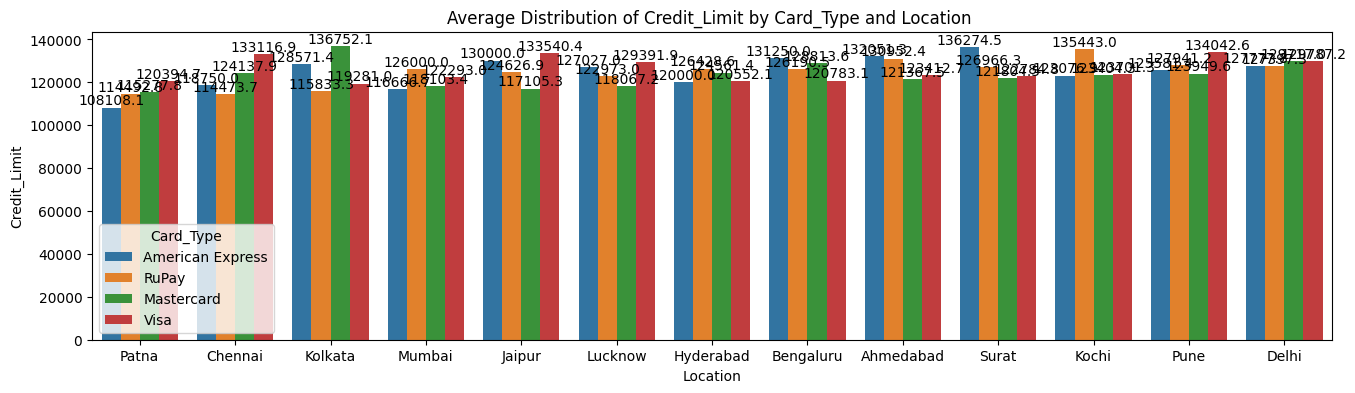

In [ ]:
gda8=df.groupby(['Card_Type','Location'])['Credit_Limit'].mean().sort_values().reset_index()
plt.figure(figsize=(16,4))
bar8=sns.barplot(data=gda8,x='Location',y='Credit_Limit',hue='Card_Type')
for container in bar8.containers:
  bar8.bar_label(container,fmt='%.1f')
plt.title("Average Distribution of Credit_Limit by Card_Type and Location ")
plt.xlabel("Location")
plt.ylabel("Credit_Limit")
plt.legend(title='Card_Type')
plt.show()


###**Interpretation:**
**In this chart we can see all card type and location of credit limit is below  1.4L , All location allow below 1.2L for all card type.**

In [ ]:
gda9=df.groupby(['Merchant_Category','Device_Type'])['Transaction_Amount'].max().reset_index()
gda9

,Merchant_Category,Device_Type,Transaction_Amount
0,Dining,Contactless Payment Device,199923.0
1,Dining,Desktop,181678.0
2,Dining,Mobile,198239.0
3,Dining,Point-of-Sale Terminal,184457.0
4,Dining,Unknown,197304.0
5,Education,Contactless Payment Device,194491.0
6,Education,Desktop,194446.0
7,Education,Mobile,181520.0
8,Education,Point-of-Sale Terminal,181120.0
9,Education,Unknown,192260.0


###**Visualize 17 : Maximum Transaction_Amount by Device_Type and Merchant_Category**

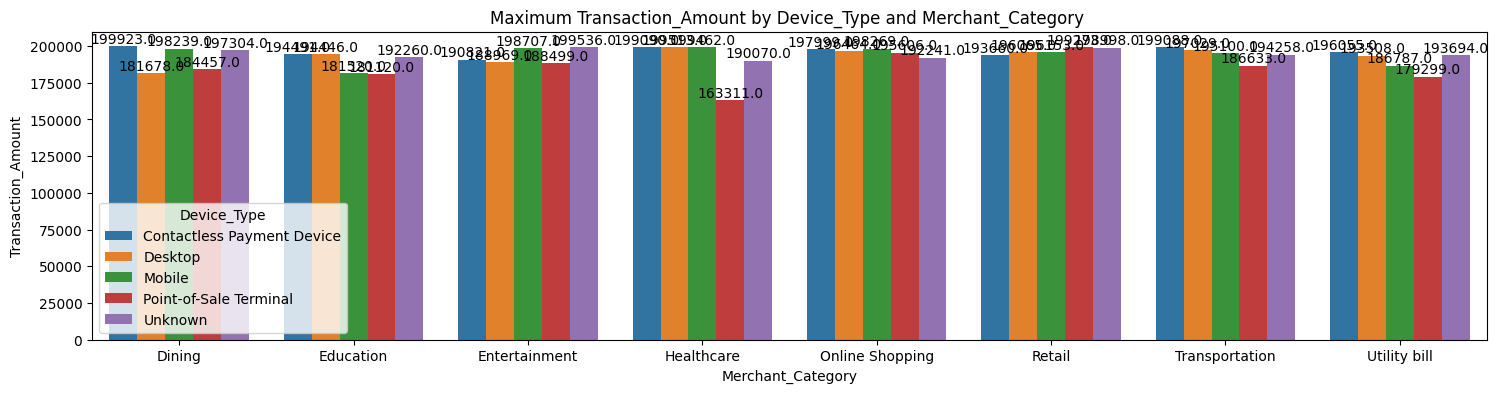

In [ ]:
gda9=df.groupby(['Merchant_Category','Device_Type'])['Transaction_Amount'].max().reset_index()
plt.figure(figsize=(18,4))
bar9=sns.barplot(data=gda9,x='Merchant_Category',y='Transaction_Amount',hue='Device_Type')
for container in bar9.containers:
  bar9.bar_label(container,fmt='%.1f')
plt.title("Maximum Transaction_Amount by Device_Type and Merchant_Category ")
plt.xlabel("Merchant_Category")
plt.ylabel("Transaction_Amount")
plt.legend(title='Device_Type')
plt.show()

###**Interpretation:**
**In this chart we can see the maximum distribution of Transaction amount by merchant category an device type.Transaction amount between 1.5L to 2L.**

###**d) Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent transactions using histograms or box plots.**

###**Visualize 18 : Distribution of Transaction_Amount & Is_Fraudulent**

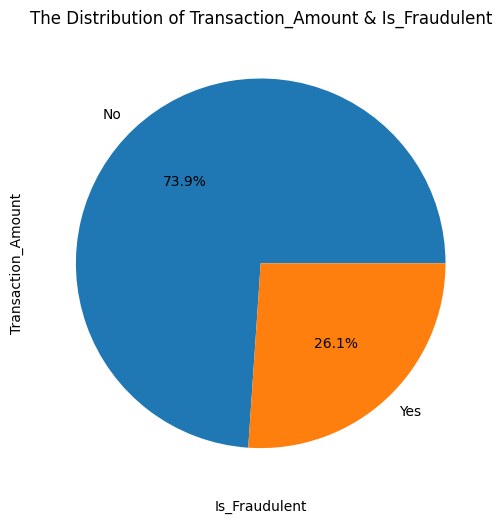

In [ ]:
pie1=df.groupby('Is_Fraudulent')['Transaction_Amount'].sum()
plt.figure(figsize=(14,6))
pie1.plot(kind='pie',autopct='%1.1f%%')
plt.title("The Distribution of Transaction_Amount & Is_Fraudulent")
plt.xlabel("Is_Fraudulent")
plt.ylabel("Transaction_Amount")
plt.show()

###**Interpretation:**
**In this chart we can the distribution of Transaction_Amount by Is_Fraudulent is 26% possible for indicate Fraudulent**.

###**Visualize 19 : Distribution of Is_Fraudulent**

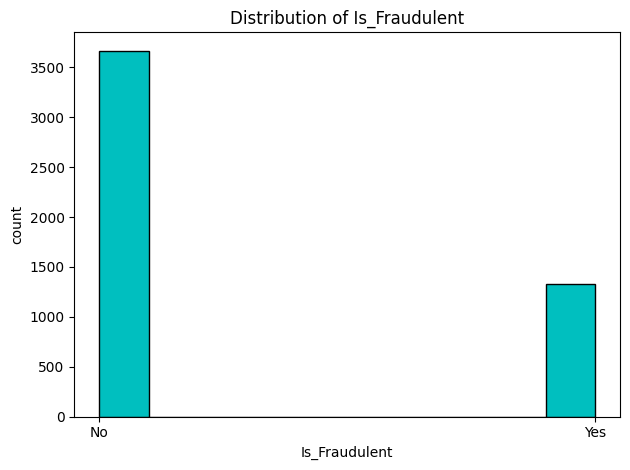

In [ ]:
plt.hist(df['Is_Fraudulent'].sort_values(),bins=10,color='c',edgecolor='black')
plt.title('Distribution of Is_Fraudulent')
plt.xlabel('Is_Fraudulent')
plt.ylabel('count')
plt.tight_layout()
plt.show()

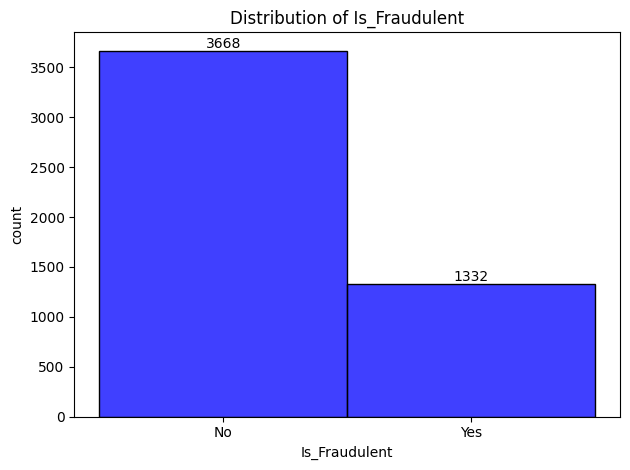

In [ ]:
gda10=df['Is_Fraudulent'].sort_values()
hist1=sns.histplot(gda10,bins=10,color='blue')
for container in hist1.containers:
 hist1.bar_label(container)
plt.title('Distribution of Is_Fraudulent')
plt.xlabel('Is_Fraudulent')
plt.ylabel('count')
plt.tight_layout()
plt.show()

###**Interpretation:**
**In this chart we can see the majority of count is not inidicate fraud.**


###**Visualize 20 : The Average Distribution of Is_Fraudulent & Transaction_Amount**

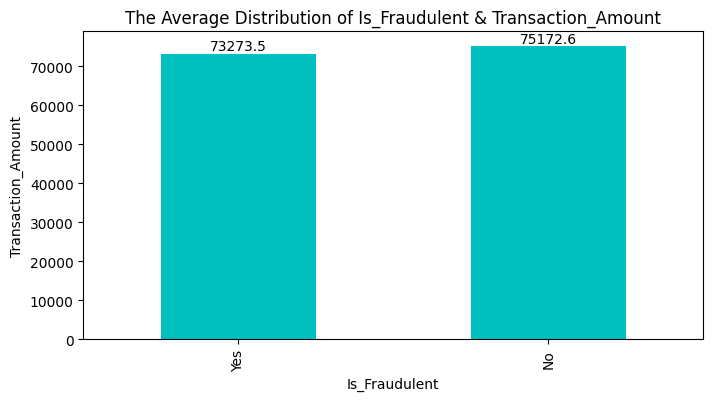

In [ ]:
avg2=df.groupby('Is_Fraudulent')['Transaction_Amount'].mean().sort_values().plot(kind='bar',figsize=(8,4),color='c')
avg2.bar_label(avg2.containers[0])
plt.title("The Average Distribution of Is_Fraudulent & Transaction_Amount")
plt.xlabel("Is_Fraudulent")
plt.ylabel("Transaction_Amount")
plt.show()

###**Interpretation:**
 **In this chart we can see the fraud indicates.Average of Transaction Amount is slightly from differ from each one.**

###**Visualize 21 : The Distribution of Is_Fraudulent & Transaction_Amount**

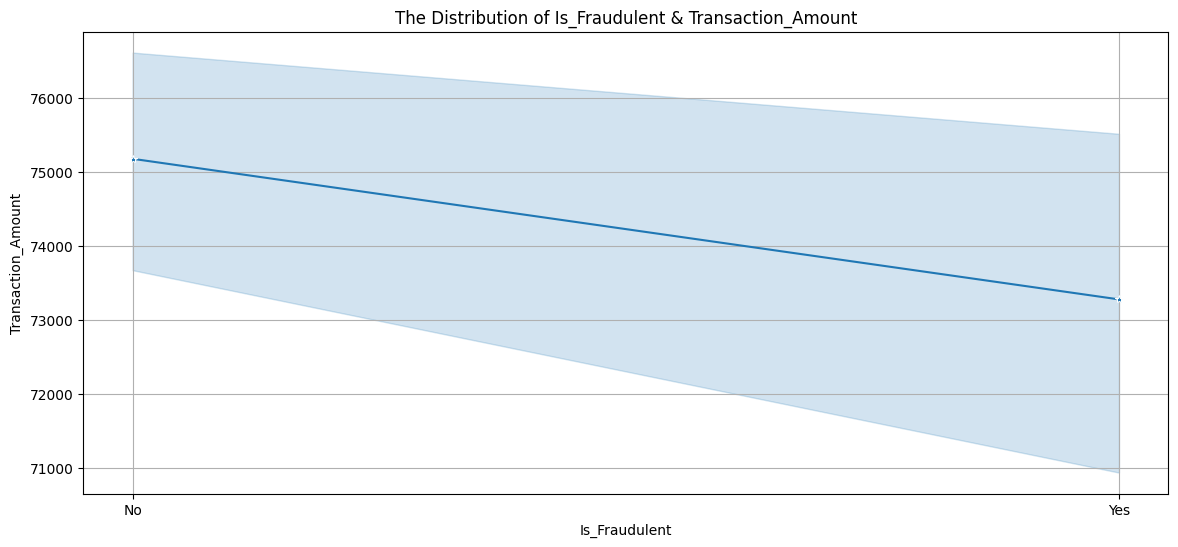

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df,x='Is_Fraudulent',y='Transaction_Amount',marker='*')
plt.title("The Distribution of Is_Fraudulent & Transaction_Amount")
plt.xlabel("Is_Fraudulent")
plt.ylabel("Transaction_Amount")
plt.grid(True)
plt.show()

###**Interpretation:**
**In this chart we can see the line between 73000 to 75000 . to indicate fraud in averge of Transaction amount is 73000.**

###**e) Investigate whether certain features are more susceptible to fraud.**

**In this Dataset has 5000 rows , to inidicate the fraud is 1332 (26%) of to indicate the fraud.**

**Card type Master card show 2 times of fraud indicates and the credit limit is 60k to 2L. Other card show one time of fraud indicates.**

**Transaction amount by location wise Ahmedabad & Lucknow is higher fraud occur to compare other location.**

**Average of Transaction amount is fraud occur in 73000.**

##**2) Data Preprocessing - Data Cleaning:**






###**a) Handle missing values if any, using appropriate techniques such as KNNImputer; mean or median imputation for numerical features, and mode imputation for categorical features.**

In [ ]:
nullcount=df.isna().sum()
nullcount[nullcount>0]

,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314
Cardholder_Average_Spend,208
Credit_Limit,9
Device_Type,40


In [ ]:
df['Card_Type'].mode()[0]

'Visa'

In [ ]:
df['Card_Type']=df['Card_Type'].fillna(df['Card_Type'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
df.dtypes

,0
Transaction_ID,object
Card_Type,object
Merchant_Category,object
Transaction_Amount,float64
Transaction_DateTime,object
Location,object
Region,object
Cardholder_Age,float64
Cardholder_Gender,object
Cardholder_Monthly_Income,float64


In [ ]:
df['Transaction_Amount'].mean()

np.float64(74667.99599519423)

In [ ]:
df['Cardholder_Age'].mean()

np.float64(49.106680369989725)

In [ ]:
df['Cardholder_Monthly_Income'].mean()

np.float64(137353.8175416133)

In [ ]:
df['Cardholder_Average_Spend'].mean()

np.float64(63058.3435663606)

In [ ]:
df['Credit_Limit'].mean()

np.float64(124654.37788018433)

In [ ]:
numeric_df=df.select_dtypes(include='number')

In [ ]:
for col in numeric_df:
  df[col]=df[col].fillna(df[col].mean())

In [ ]:
df['Merchant_Category'].mode()[0]

'Online Shopping'

In [ ]:
df['Cardholder_Gender'].mode()[0]

'Female'

In [ ]:
df['Device_Type'].mode()[0]

'Unknown'

In [ ]:
df['Merchant_Category']=df['Merchant_Category'].fillna(df['Merchant_Category'].mode()[0])
df['Cardholder_Gender']=df['Cardholder_Gender'].fillna(df['Cardholder_Gender'].mode()[0])
df['Device_Type']=df['Device_Type'].fillna(df['Device_Type'].mode()[0])

In [ ]:
df.isnull().sum()


,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


###**Summary:**
**To impute Numeric null values in Mean value & Categorical null values impute mode value.**

###**b) Check for outliers in numerical features using statistical methods like Z-score or IQR (Interquartile Range) and remove them if necessary to ensure data quality.**

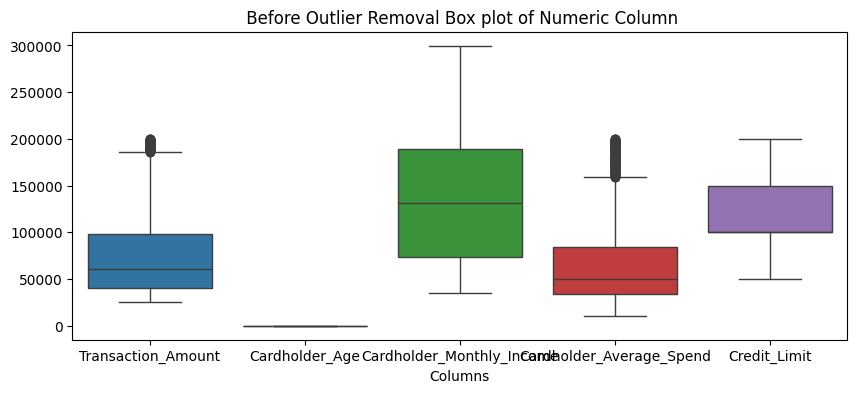

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=numeric_df)
plt.title(' Before Outlier Removal Box plot of Numeric Column')
plt.xlabel('Columns')
plt.show()

###**Interpretation:**
**In this chart we can see some outliers in Transaction_Amount and Cardholder_Average_Spend.**

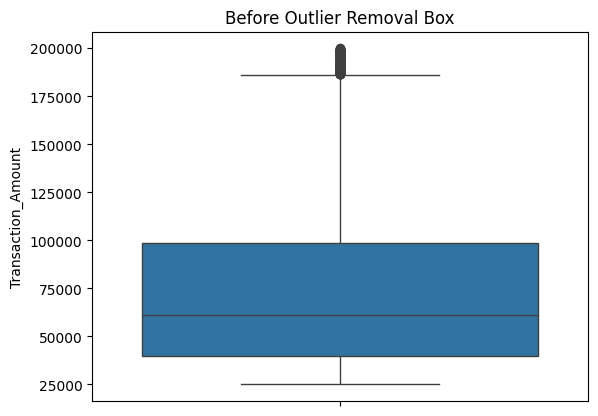

In [ ]:
sns.boxplot(data=df['Transaction_Amount'])
plt.title('Before Outlier Removal Box')
plt.show()

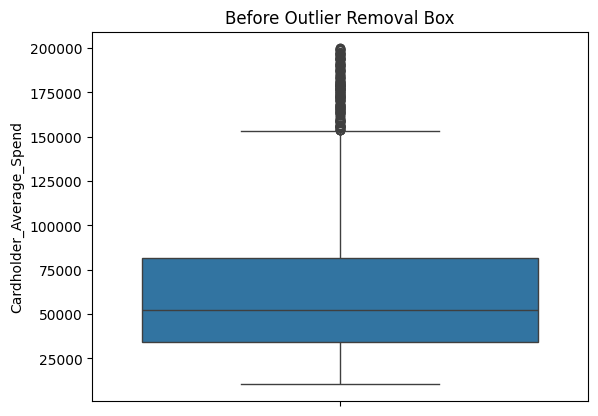

In [ ]:
sns.boxplot(data=df['Cardholder_Average_Spend'])
plt.title('Before Outlier Removal Box')
plt.show()

###**Interpretation:**
**In this chart we can see some outliers in Transaction_Amount above 1.75L and Cardholder_Average_Spend to show outliers in above 1.5L.**

###**Handle outliers in function:**

In [ ]:
def remove_ouliers(df,columns):
 for col in columns:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
  df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
  return df

In [ ]:
df.shape

(5000, 15)

In [ ]:
newdf=remove_ouliers(df,['Transaction_Amount'])
newdf.shape

(4903, 15)

In [ ]:
df1=remove_ouliers(newdf,['Cardholder_Average_Spend'])
df1.shape

(4746, 15)

In [ ]:
5000-4746

254

###**Summary: 254 Data points are Outliers.**

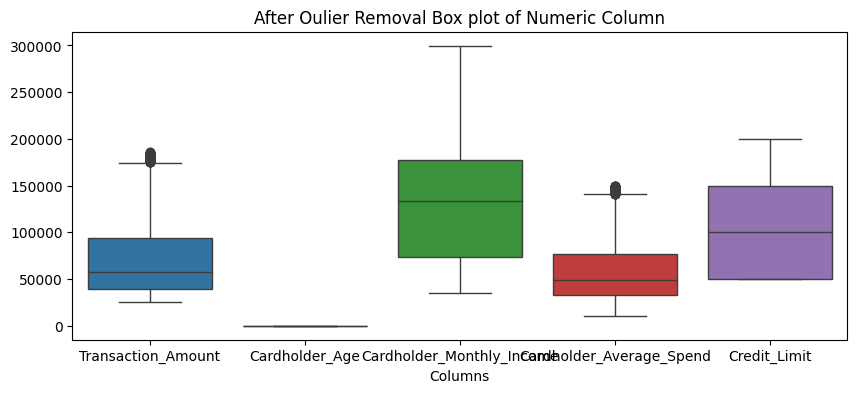

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df1)
plt.title('After Oulier Removal Box plot of Numeric Column')
plt.xlabel('Columns')
plt.show()

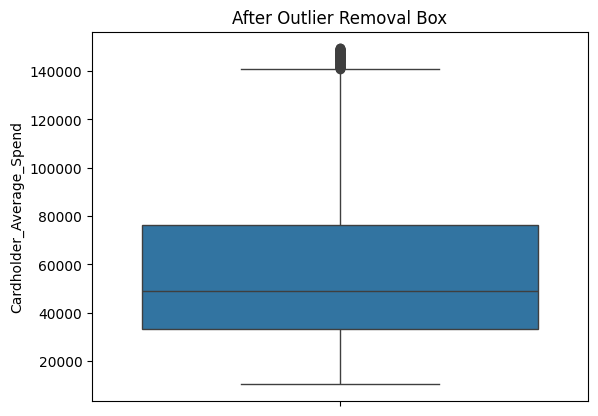

In [ ]:
sns.boxplot(data=df1['Cardholder_Average_Spend'])
plt.title('After Outlier Removal Box')
plt.show()

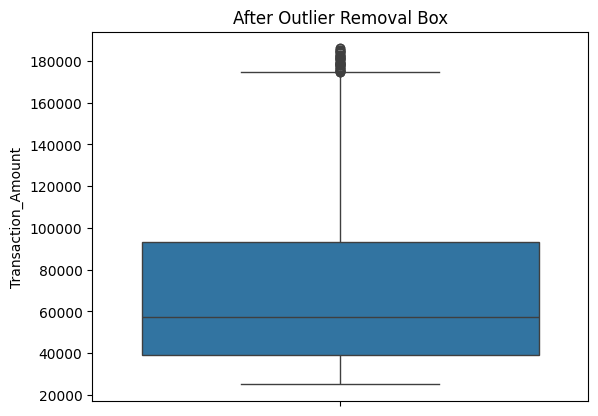

In [ ]:
sns.boxplot(data=df1['Transaction_Amount'])
plt.title('After Outlier Removal Box')
plt.show()

###**Interpretation:**
**In this chart we can see the difference of after outlier removal.Reduce the outliers.**

###**c) Assess skewness in numerical features by calculating the skewness score. If any features are highly skewed, consider applying transformations such as square root or log transformation to improve their distribution before scaling, if needed.**

In [ ]:
import plotly.figure_factory as ff
fig=ff.create_distplot([df1['Cardholder_Average_Spend']],['Average Spend'],show_hist=False)
fig.show()

In [ ]:
sscore=df1['Cardholder_Average_Spend'].skew()
sscore

np.float64(0.8996510282876518)

In [ ]:
import plotly.figure_factory as ff
fig1=ff.create_distplot([df1['Transaction_Amount']],['Transaction Amount'],show_hist=False)
fig1.show()

In [ ]:
sscore1=df1['Transaction_Amount'].skew()
sscore1

np.float64(0.9343163226542156)

In [ ]:
squard=df1['Cardholder_Average_Spend']**0.5
ss1=squard.skew()
ss1

np.float64(0.4080926679270201)

In [ ]:
squard1=df1['Transaction_Amount']**0.5
ss2=squard1.skew()
ss2

np.float64(0.5578386164941278)

In [ ]:
import plotly.figure_factory as ff
fig2=ff.create_distplot([squard],['Average Spend'],show_hist=False)
fig2.show()

In [ ]:
import plotly.figure_factory as ff
fig3=ff.create_distplot([squard1],['Transaction Spend'],show_hist=False)
fig3.show()

###**Summary:**
**In this chart to see the skewness is 0.8 & 0.9 , this is not perfect.Use Square for this.**

**0--->perfect data.**

**-0.5 to 05 --> mild Skewness, ignore it.**

##**3) Feature Engineering:**

###**a) Identify the categorical features in the dataset.**

In [ ]:
df1.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
5,I812SG19,RuPay,Entertainment,131918.0,2020-01-04 19:55:12,Mumbai,West,80.0,Male,166671.0,80393.44,150000.0,Point-of-Sale Terminal,Saturday,No
6,Y182UO40,Visa,Retail,139036.0,2020-01-05 16:33:10,Surat,West,33.0,Male,171991.0,84215.74,150000.0,Desktop,Sunday,Yes


In [ ]:
cat_col=['Card_Type','Merchant_Category','Location','Region','Cardholder_Gender','Device_Type','Is_Fraudulent']

###**b) Encode categorical features to numerical using techniques like one-hot encoding or label encoding techniques to prepare the data for machine learning algorithms.**

###**One-Hot Encoding:**

In [ ]:
df_one=pd.get_dummies(df1.Is_Fraudulent,prefix="Fraudulent_")
df_one.head()

,Fraudulent__No,Fraudulent__Yes
0,True,False
1,True,False
4,True,False
5,True,False
6,False,True


In [ ]:
df_one=df_one.astype(int)
df_one.head()

,Fraudulent__No,Fraudulent__Yes
0,1,0
1,1,0
4,1,0
5,1,0
6,0,1


In [ ]:
finaldf=pd.concat([df1,df_one],axis=1)
finaldf.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Fraudulent__No,Fraudulent__Yes
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No,1,0
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No,1,0
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No,1,0
5,I812SG19,RuPay,Entertainment,131918.0,2020-01-04 19:55:12,Mumbai,West,80.0,Male,166671.0,80393.44,150000.0,Point-of-Sale Terminal,Saturday,No,1,0
6,Y182UO40,Visa,Retail,139036.0,2020-01-05 16:33:10,Surat,West,33.0,Male,171991.0,84215.74,150000.0,Desktop,Sunday,Yes,0,1


###**Label Encoding:**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
finaldf['Card_Type']=LabelEncoder().fit_transform(finaldf['Card_Type'])
label=LabelEncoder()
finaldf['Merchant_Category']=label.fit_transform(finaldf['Merchant_Category'])
finaldf['Location']=label.fit_transform(finaldf['Location'])
finaldf['Region']=label.fit_transform(finaldf['Region'])
finaldf['Cardholder_Gender']=label.fit_transform(finaldf['Cardholder_Gender'])
finaldf['Device_Type']=label.fit_transform(finaldf['Device_Type'])
finaldf['Is_Fraudulent']=label.fit_transform(finaldf['Is_Fraudulent'])
finaldf.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Fraudulent__No,Fraudulent__Yes
0,W963UK57,1,7,27214.0,2020-01-01 09:43:17,10,0,23.0,0,94632.0,36369.65,100000.0,4,Wednesday,0,1,0
1,V606KV56,0,5,83956.0,2020-01-03 16:26:13,12,3,49.0,1,148118.0,89179.12,150000.0,1,Friday,0,1,0
4,K256ZN73,2,5,81170.0,2020-01-04 17:26:47,8,1,37.0,0,174470.0,52713.09,200000.0,2,Saturday,0,1,0
5,I812SG19,2,2,131918.0,2020-01-04 19:55:12,9,3,80.0,1,166671.0,80393.44,150000.0,3,Saturday,0,1,0
6,Y182UO40,3,5,139036.0,2020-01-05 16:33:10,12,3,33.0,1,171991.0,84215.74,150000.0,1,Sunday,1,0,1


##**4) Feature Selection:**

###**a) Select relevant features that have the most impact on predicting fraudulent transactions.**

In [ ]:
most_Feature=['Card_Type','Merchant_Category','Transaction_Amount','Location',
               'Region','Cardholder_Age','Cardholder_Gender','Cardholder_Monthly_Income',
               'Cardholder_Average_Spend','Credit_Limit','Device_Type','Is_Fraudulent']

###**b) Identify and remove redundant or irrelevant features that do not contribute significantly to the prediction task.**

In [ ]:
finaldf.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Fraudulent__No,Fraudulent__Yes
0,W963UK57,1,7,27214.0,2020-01-01 09:43:17,10,0,23.0,0,94632.0,36369.65,100000.0,4,Wednesday,0,1,0
1,V606KV56,0,5,83956.0,2020-01-03 16:26:13,12,3,49.0,1,148118.0,89179.12,150000.0,1,Friday,0,1,0
4,K256ZN73,2,5,81170.0,2020-01-04 17:26:47,8,1,37.0,0,174470.0,52713.09,200000.0,2,Saturday,0,1,0
5,I812SG19,2,2,131918.0,2020-01-04 19:55:12,9,3,80.0,1,166671.0,80393.44,150000.0,3,Saturday,0,1,0
6,Y182UO40,3,5,139036.0,2020-01-05 16:33:10,12,3,33.0,1,171991.0,84215.74,150000.0,1,Sunday,1,0,1


In [ ]:
finaldf1=finaldf.drop(columns=['Transaction_ID','Transaction_DateTime','Day_of_Week','Fraudulent__No','Fraudulent__Yes'])

In [ ]:
finaldf1.head()

,Card_Type,Merchant_Category,Transaction_Amount,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Is_Fraudulent
0,1,7,27214.0,10,0,23.0,0,94632.0,36369.65,100000.0,4,0
1,0,5,83956.0,12,3,49.0,1,148118.0,89179.12,150000.0,1,0
4,2,5,81170.0,8,1,37.0,0,174470.0,52713.09,200000.0,2,0
5,2,2,131918.0,9,3,80.0,1,166671.0,80393.44,150000.0,3,0
6,3,5,139036.0,12,3,33.0,1,171991.0,84215.74,150000.0,1,1


In [ ]:
X=finaldf1.drop(columns=['Is_Fraudulent'])
y=finaldf1['Is_Fraudulent']

##**5) Split data into training and testing:**

###**a) Divide the dataset into training and testing sets to evaluate the model's performance.**

In [ ]:
finaldf1.head()

,Card_Type,Merchant_Category,Transaction_Amount,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Is_Fraudulent
0,1,7,27214.0,10,0,23.0,0,94632.0,36369.65,100000.0,4,0
1,0,5,83956.0,12,3,49.0,1,148118.0,89179.12,150000.0,1,0
4,2,5,81170.0,8,1,37.0,0,174470.0,52713.09,200000.0,2,0
5,2,2,131918.0,9,3,80.0,1,166671.0,80393.44,150000.0,3,0
6,3,5,139036.0,12,3,33.0,1,171991.0,84215.74,150000.0,1,1


In [ ]:
finaldf1.shape

(4746, 12)

In [ ]:
X.shape

(4746, 11)

In [ ]:
y.shape

(4746,)

###**b) Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent transactions to avoid data leakage.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
finaldf1.shape

(4746, 12)

In [ ]:
X_train.shape

(3796, 11)

In [ ]:
X_test.shape

(950, 11)

In [ ]:
y_train.shape

(3796,)

In [ ]:
y_test.shape

(950,)

##**6) Feature Scaling:**

###**a) Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.**

In [ ]:
finaldf1.head()

,Card_Type,Merchant_Category,Transaction_Amount,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Is_Fraudulent
0,1,7,27214.0,10,0,23.0,0,94632.0,36369.65,100000.0,4,0
1,0,5,83956.0,12,3,49.0,1,148118.0,89179.12,150000.0,1,0
4,2,5,81170.0,8,1,37.0,0,174470.0,52713.09,200000.0,2,0
5,2,2,131918.0,9,3,80.0,1,166671.0,80393.44,150000.0,3,0
6,3,5,139036.0,12,3,33.0,1,171991.0,84215.74,150000.0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

###**b) Common scaling techniques include Min-Max scaling or Standardization (Z-score normalization).**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##**7) Build the Machine Learning Model:**

###**a) Import the necessary modules and libraries for building and evaluating machine learning models.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,precision_score,recall_score,
    f1_score,confusion_matrix,classification_report)

In [ ]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
log_pred=log_model.predict(X_test)
log_acc=accuracy_score(y_test,log_pred)
log_f1=f1_score(y_test,log_pred)

In [ ]:
print(f"Logistic Regression Accuracy:{log_acc:.2f}")
print(f"Logistic Regression F1 Score:{log_f1:.2f}")

Logistic Regression Accuracy:0.74
Logistic Regression F1 Score:0.00


###**b) Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the accuracy score and F1-score for each classifier.**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,precision_score,recall_score,
    f1_score,confusion_matrix,classification_report)

In [ ]:
models={'Logistic Regression':LogisticRegression(),
        'Gaussian Naive Bayes':GaussianNB(),
        'Decision Tree Classifier':DecisionTreeClassifier(max_depth=5,random_state=42),
        'Random Forest Classifier':RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42),
        'KNeighbors Classifier':KNeighborsClassifier(),
        'Support Vector':SVC()}

###**c) Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step.**


In [ ]:
results=[]
for name,model in models.items():
  model.fit(X_train,y_train)
  Y_pred=model.predict(X_test)
  acc=accuracy_score(y_test,Y_pred)
  f1=f1_score(y_test,Y_pred)
  con=confusion_matrix(y_test,Y_pred)
  results.append({'model':name,'Accuracy':acc,'F1 Score':f1,'Confusion Matrix':con})
results_df = pd.DataFrame(results).sort_values(by='F1 Score',ascending=False)
print(results_df)


                      model  Accuracy  F1 Score         Confusion Matrix
4     KNeighbors Classifier  0.656842  0.132979  [[599, 105], [221, 25]]
2  Decision Tree Classifier  0.738947  0.023622     [[699, 5], [243, 3]]
1      Gaussian Naive Bayes  0.741053  0.000000     [[704, 0], [246, 0]]
0       Logistic Regression  0.741053  0.000000     [[704, 0], [246, 0]]
3  Random Forest Classifier  0.741053  0.000000     [[704, 0], [246, 0]]
5            Support Vector  0.741053  0.000000     [[704, 0], [246, 0]]


In [ ]:
best_index=np.argmax(results_df['F1 Score'].values)
best_model=results_df['model'].values[best_index]
best_accuracy=results_df['Accuracy'].values[best_index]
best_f1=results_df['F1 Score'].values[best_index]

In [ ]:
print(f'Best Model:{best_model},Highest Accuracy:{best_accuracy},F1 Score:{best_f1}')

Best Model:KNeighbors Classifier,Highest Accuracy:0.6568421052631579,F1 Score:0.13297872340425532


###**d) Train the selected model using the training dataset and evaluate its performance using appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
knn_model.fit(X_train, y_train)
Knn_pred = knn_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, Knn_pred)
accuracy = accuracy_score(y_test, Knn_pred)
precision = precision_score(y_test, Knn_pred)
recall = recall_score(y_test, Knn_pred)
f1 = f1_score(y_test, Knn_pred)

In [ ]:
print("Evaluation for K-Nearest Neighbors:\n")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(classification_report(y_test, Knn_pred))

Evaluation for K-Nearest Neighbors:

Confusion Matrix:
[[599 105]
 [221  25]]
Accuracy:  0.6568
Precision: 0.1923
Recall:    0.1016
F1 Score:  0.1330
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       704
           1       0.19      0.10      0.13       246

    accuracy                           0.66       950
   macro avg       0.46      0.48      0.46       950
weighted avg       0.59      0.66      0.62       950



###**e) Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.**

###**Summary:**

**In this dataset Accuracy is 66% only**.

**Low Recall & F1 score.**

**F1 score is 0.13 this is not perfect data , data imbalanced, sensitive data.**

**Confusion matrix is to missed the fraud detection 221 & correctly predict 25 only.**

**Missing majority fraud cases.**


